In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import datetime
plt.rcParams['figure.figsize'] = (11.0, 9.0)
%matplotlib inline

In [2]:
train = pd.read_csv('training.csv', low_memory=False)
test = pd.read_csv('predict.csv', low_memory=False)

### Day

In [34]:
train['post'] = train['posted_time'].apply(lambda x: pd.Timestamp(x, unit='ms'))
train['post']

0      2017-12-23 17:26:40
1      2017-12-24 10:06:40
2      2017-12-24 12:53:20
3      2017-12-25 08:20:00
4      2017-12-25 08:20:00
               ...        
9413   2019-11-04 09:33:20
9414   2019-07-31 08:00:00
9415   2019-11-06 17:06:40
9416   2019-11-06 17:06:40
9417   2019-11-06 17:06:40
Name: post, Length: 9418, dtype: datetime64[ns]

In [35]:
train['post_date'] = train['posted_time'].apply(lambda x: pd.Timestamp(x, unit='ms').date())
train['post_date']

0       2017-12-23
1       2017-12-24
2       2017-12-24
3       2017-12-25
4       2017-12-25
           ...    
9413    2019-11-04
9414    2019-07-31
9415    2019-11-06
9416    2019-11-06
9417    2019-11-06
Name: post_date, Length: 9418, dtype: object

In [6]:
train['post_hour'] = train['posted_time'].apply(lambda x: pd.Timestamp(x, unit='ms').time())

In [7]:
# choosing the day with the largest number of news
day1 = train.loc[train['post_date'] == datetime.date(2018, 6, 29)]

In [8]:
# November 4 2019
train.post_date.describe()

count           9418
unique           695
top       2018-06-29
freq             166
Name: post_date, dtype: object

In [9]:
train['post_hour'].describe()

count         9418
unique         208
top       16:33:20
freq           216
Name: post_hour, dtype: object

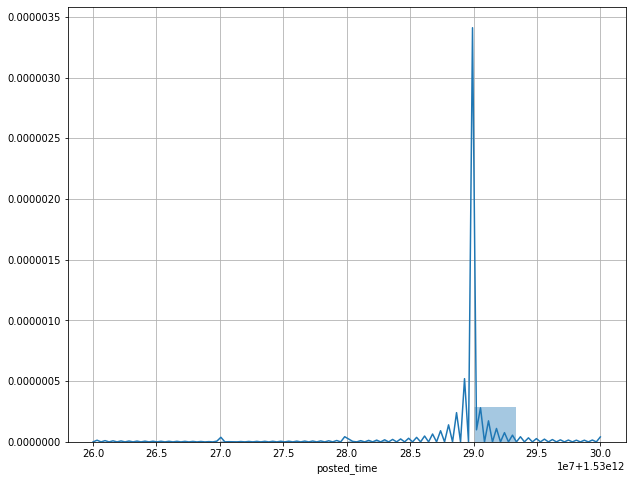

In [10]:
plt.figure(figsize=(10, 8))
sns.distplot(day1['posted_time'])
plt.grid()

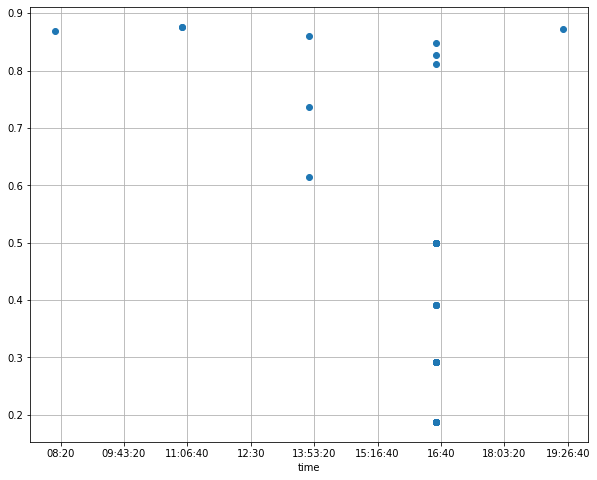

In [14]:
plt.figure(figsize = (10,8))
plt.plot_date(day1['post_hour'], day1['rank'])
plt.grid()
plt.show()

In [17]:
day2 = train.loc[train['post_date'] == datetime.date(2018, 3, 21)]

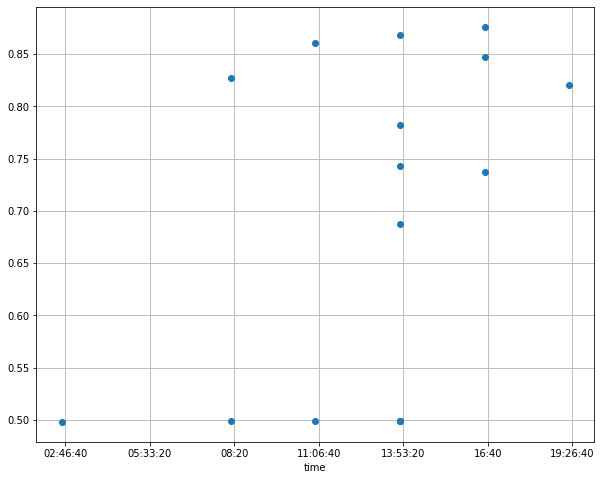

In [18]:
plt.figure(figsize = (10,8))
plt.plot_date(day2['post_hour'], day2['rank'])
plt.grid()
plt.show()

In [20]:
# day of a week - Monday == 1 to Sunday == 7
train['day_of_week'] = train['posted_time'].apply(lambda x: pd.Timestamp(x, unit='ms').isoweekday())a

In [ ]:
train.sort_values(by='post_date', inplace=True)
train.set_index('post_date', inplace=True)

In [43]:
# selecting just one week (but there is no Saturday in this specific one)
start_date = pd.to_datetime('2019-10-28').date()
end_date = pd.to_datetime('2019-11-03').date()
week = train.loc[start_date : end_date]
week

,id,posted_time,updated_time,age,updated_age,app_type,owner_id,owner_type,owner_influence,number_of_likes,...,participant5_is_employee,participant5_is_lead,participant5_is_in_connections,participant5_focus,participant5_order,participant5_influence,rank,post,post_hour,day_of_week
post_date,,,,,,,,,,,,,,,,,,,,,
2019-10-28,268053,1.572280e+12,1.572280e+12,4.922746e+09,4.921706e+09,other,27310,space,0.99980,0,...,1,0,1,sales,1,0.99828,0.86827,2019-10-28 16:26:40,16:26:40,1
2019-10-28,268047,1.572280e+12,1.572280e+12,4.924131e+09,4.924131e+09,other,27310,space,0.99980,10,...,1,0,1,marketing,1,0.99886,0.86639,2019-10-28 16:26:40,16:26:40,1
2019-10-28,268015,1.572270e+12,1.572270e+12,4.938775e+09,4.938775e+09,calendar,13853,space,0.10000,0,...,0,0,1,other,1,0.23077,0.72134,2019-10-28 13:40:00,13:40:00,1
2019-10-28,267981,1.572260e+12,1.572260e+12,4.951199e+09,4.951069e+09,other,27310,space,0.99980,3,...,0,0,1,other,1,0.23077,0.83856,2019-10-28 10:53:20,10:53:20,1
2019-10-28,268014,1.572270e+12,1.572270e+12,4.938944e+09,4.938944e+09,calendar,13853,space,0.10000,0,...,0,0,1,marketing,1,0.23077,0.49858,2019-10-28 13:40:00,13:40:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-01,268653,1.572620e+12,1.572620e+12,4.586522e+09,4.586522e+09,other,29314,space,0.98761,16,...,1,0,0,marketing,1,0.99891,0.86077,2019-11-01 14:53:20,14:53:20,5
2019-11-01,268634,1.572620e+12,1.572620e+12,4.588385e+09,4.588385e+09,other,3201,space,0.99992,38,...,1,0,0,other,1,0.99480,0.87492,2019-11-01 14:53:20,14:53:20,5
2019-11-01,268687,1.572620e+12,1.572620e+12,4.583498e+09,4.583498e+09,other,124733,user,0.10000,10,...,1,0,0,other,1,0.97487,0.85437,2019-11-01 14:53:20,14:53:20,5


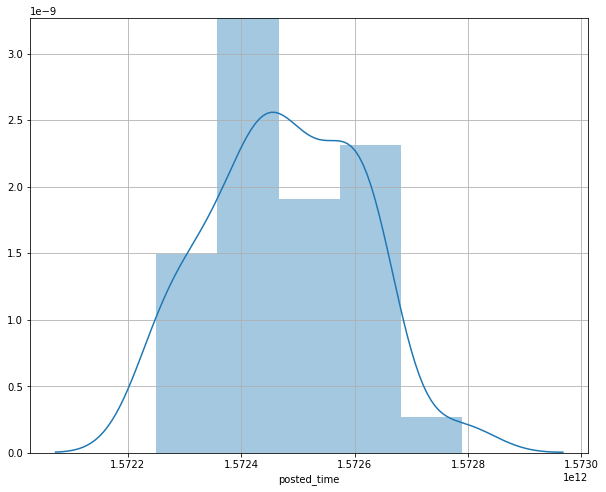

In [53]:
plt.figure(figsize=(10, 8))
sns.distplot(week['posted_time'])
plt.grid()

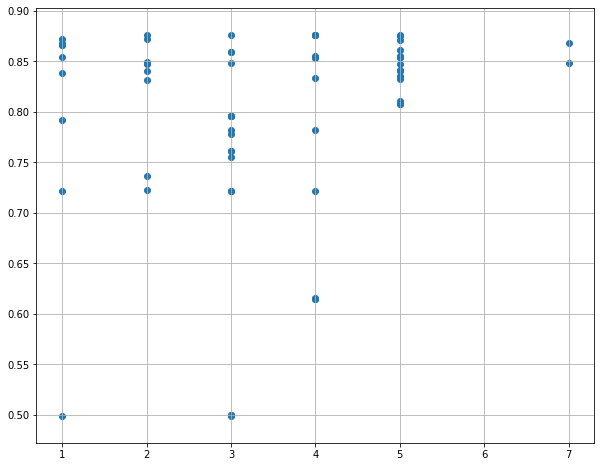

In [51]:
plt.figure(figsize = (10,8))
plt.scatter(week['day_of_week'], week['rank'])
plt.grid()
plt.show()

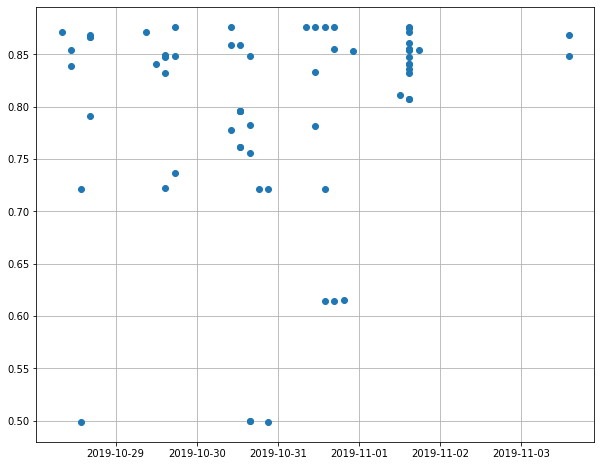

In [52]:
plt.figure(figsize = (10,8))
plt.plot_date(week['post'], week['rank'])
plt.grid()
plt.show()

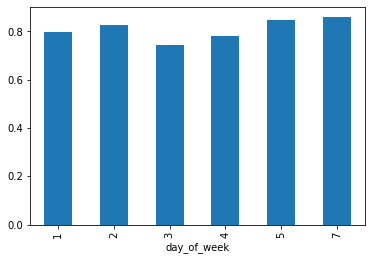

In [69]:
week.groupby('day_of_week')['rank'].mean().plot(kind='bar')